In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

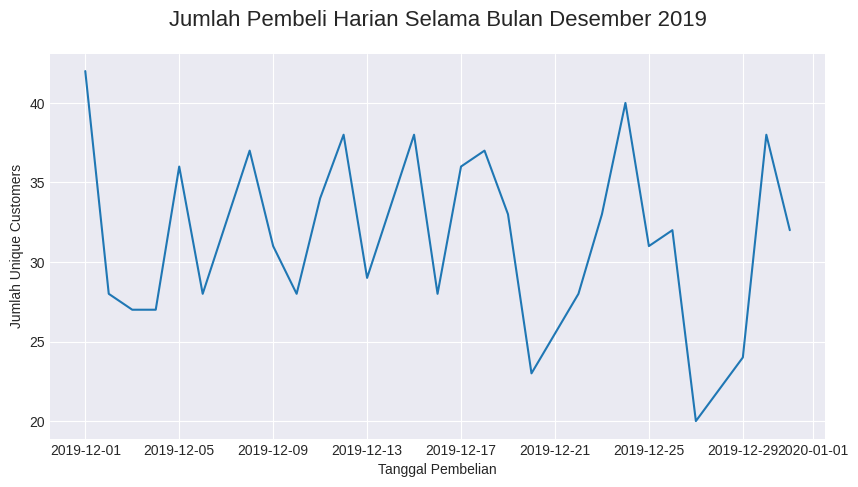

In [ ]:
dataset['order_date'] = pd.to_datetime(dataset['order_date'])
desember_data = dataset[(dataset['order_date'].dt.month == 12) & (dataset['order_date'].dt.year == 2019)]
jumlah_customers_per_tanggal = desember_data.groupby('order_date')['order_id'].nunique()
plt.figure(figsize=(10, 5))
plt.plot(jumlah_customers_per_tanggal.index, jumlah_customers_per_tanggal.values)
plt.title('Jumlah Pembeli Harian Selama Bulan Desember 2019', loc='center', pad=20, fontsize=15.9,)
plt.xlabel('Tanggal Pembelian')
plt.ylabel('Jumlah Unique Customers')
plt.axis('on')
plt.grid(True)
plt.show()

In [ ]:
dataset_top5brand_dec = (dataset.groupby('quantity')
                                  .max()
                                  .reset_index()
                                  .sort_values(by='quantity', ascending=False)
                                  .head(5))
print(dataset_top5brand_dec)

    quantity  order_id order_date  customer_id             city     province  \
63       720   1692658 2019-09-18        16422       Yogyakarta   Yogyakarta   
62       600   1671277 2019-07-11        12908  Jakarta Selatan  DKI Jakarta   
61       576   1697809 2019-10-03        16029        Surakarta   Jawa Timur   
60       480   1722277 2019-11-28        16684  Jakarta Selatan  DKI Jakarta   
59       432   1699786 2019-10-08        18251  Jakarta Selatan   Jawa Barat   

   product_id    brand  item_price  
63      P0596  BRAND_B      100000  
62      P0263  BRAND_A      264000  
61      P3613  BRAND_S      383000  
60      P2445  BRAND_P      159000  
59      P2756  BRAND_P      138000  


<ipython-input-150-7077d44081a9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby(['brand', 'order_date']).sum()['quantity'].reset_index()
<ipython-input-150-7077d44081a9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top5_brands = grouped_data.groupby('brand').sum().nlargest(5, 'quantity').index


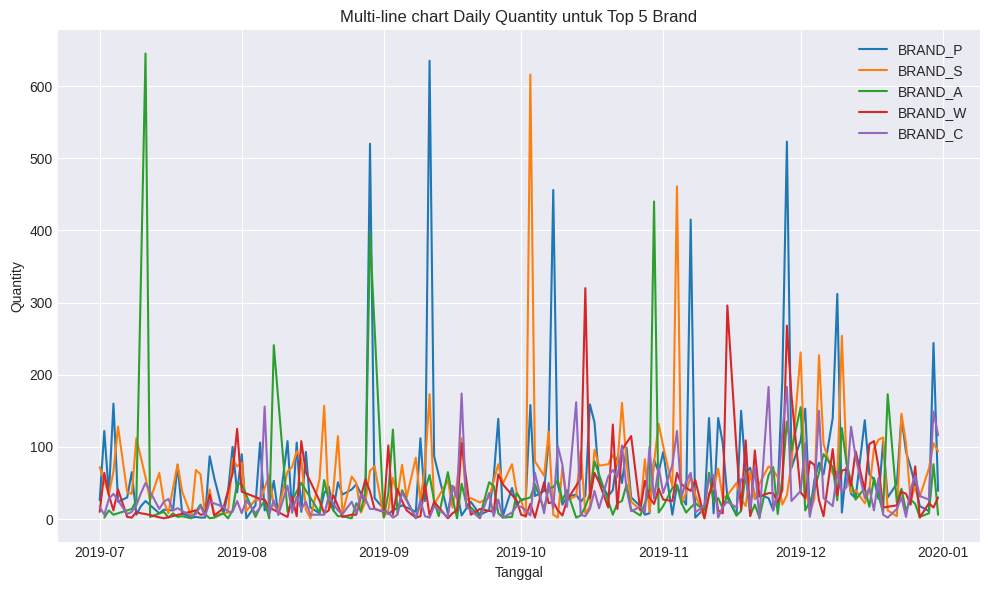

In [ ]:
import matplotlib.pyplot as plt
grouped_data = dataset.groupby(['brand', 'order_date']).sum()['quantity'].reset_index()
top5_brands = grouped_data.groupby('brand').sum().nlargest(5, 'quantity').index
top5_data = grouped_data[grouped_data['brand'].isin(top5_brands)]
plt.figure(figsize=(10, 6))

for brand in top5_brands:
    brand_data = top5_data[top5_data['brand'] == brand]
    plt.plot(brand_data['order_date'], brand_data['quantity'], label=brand)

plt.xlabel('Tanggal')
plt.ylabel('Quantity')
plt.title('Daily Quantity untuk Top 5 Brand')

plt.legend()
plt.tight_layout()
plt.show()

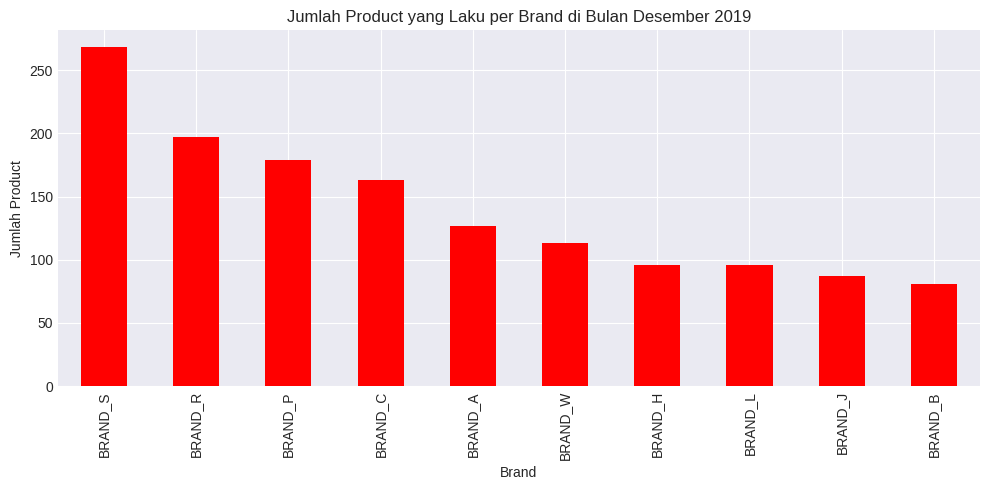

In [ ]:
import matplotlib.pyplot as plt
december_data = dataset[(dataset['order_date'].dt.month == 12) & (dataset['order_date'].dt.year == 2019)]
brand_product_count = december_data.groupby('brand')['product_id'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
brand_product_count.plot(kind='bar',color='red')
plt.xlabel('Brand')
plt.ylabel('Jumlah Product')
plt.title('Jumlah Product yang Laku per Brand di Bulan Desember 2019')
plt.tight_layout()
plt.show()

<ipython-input-145-0cabfc512578>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_data['sales_category'] = pd.cut(december_data['quantity'], bins=[0, 100, float('inf')], labels=['<100', '>=100'])


<Figure size 1000x500 with 0 Axes>

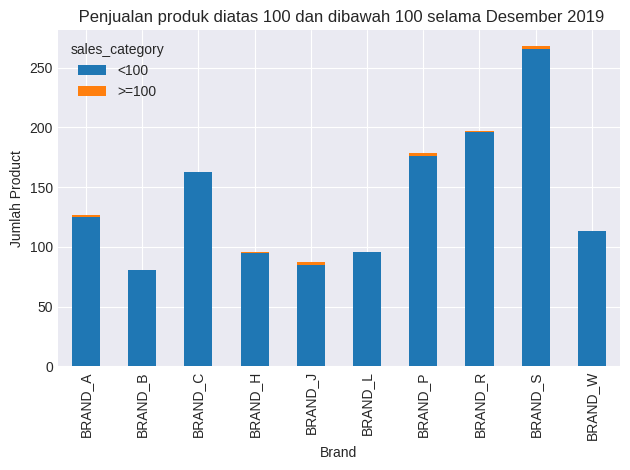

In [ ]:
import matplotlib.pyplot as plt
december_data = dataset[(dataset['order_date'].dt.month == 12) & (dataset['order_date'].dt.year == 2019)]
december_data['sales_category'] = pd.cut(december_data['quantity'], bins=[0, 100, float('inf')], labels=['<100', '>=100'])
category_counts = december_data.groupby(['brand', 'sales_category'])['product_id'].count().unstack().fillna(0)

plt.figure(figsize=(10, 5))
category_counts.plot(kind='bar', stacked=True)

plt.xlabel('Brand')
plt.ylabel('Jumlah Product')
plt.title(' Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019')

plt.tight_layout()
plt.show()


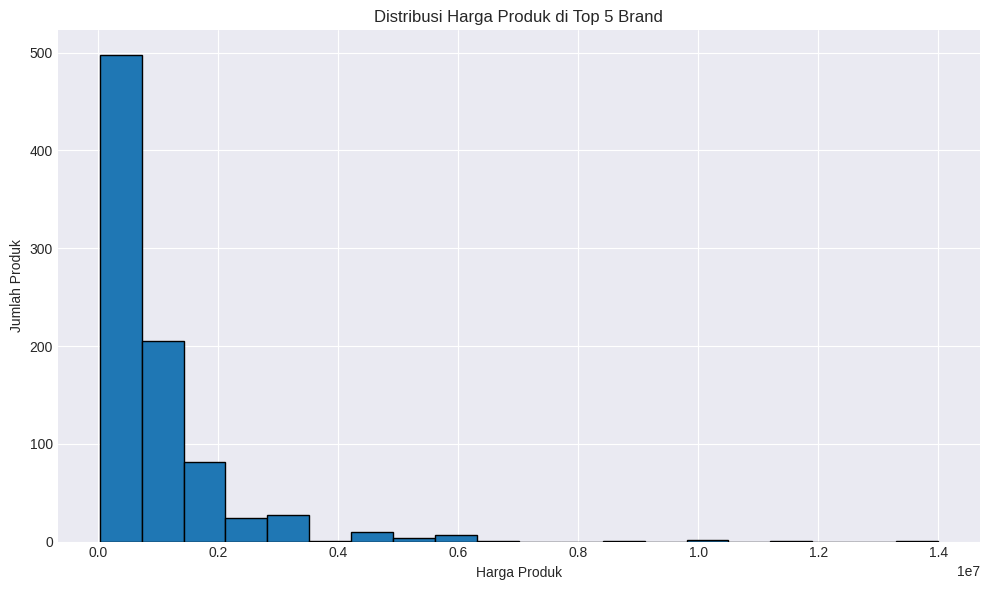

In [ ]:
import matplotlib.pyplot as plt
top5_brands = dataset.groupby('brand')['quantity'].sum().nlargest(5).index
top5_data = dataset[dataset['brand'].isin(top5_brands)]
median_prices = top5_data.groupby('product_id')['item_price'].median()
plt.figure(figsize=(10, 6))

plt.hist(median_prices, bins=20, edgecolor='black')

plt.xlabel('Harga Produk')
plt.ylabel('Jumlah Produk')
plt.title('Distribusi Harga Produk di Top 5 Brand')

plt.tight_layout()
plt.show()

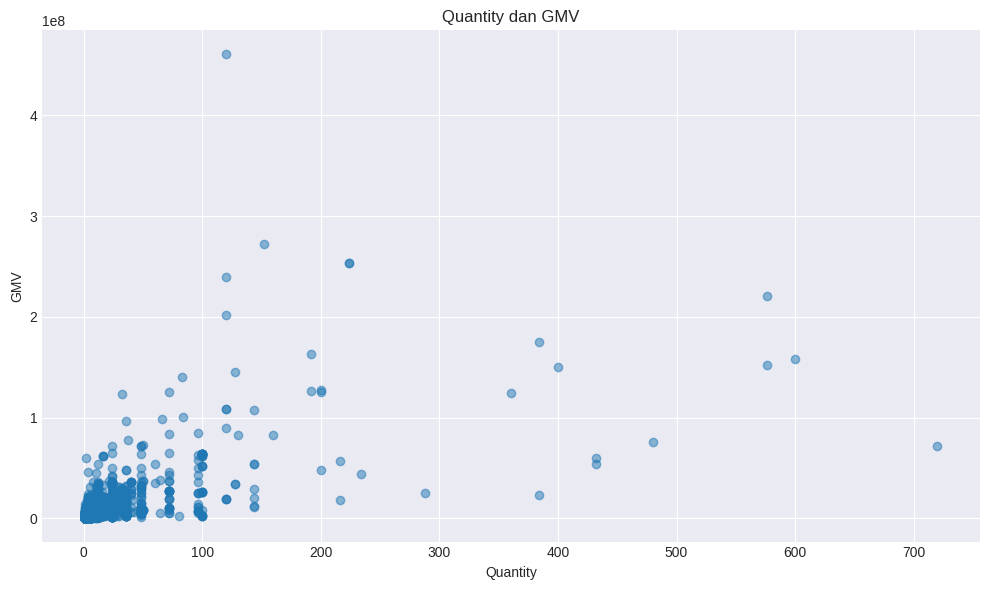

<ipython-input-133-5c0ec079ed8f>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


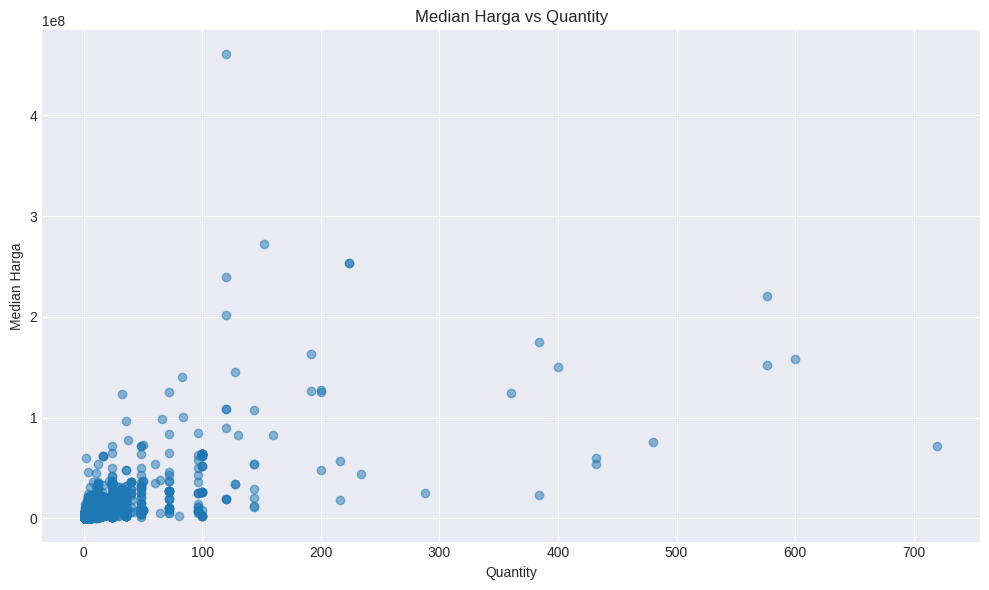

In [ ]:
import matplotlib.pyplot as plt
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
data_analysis = dataset[['product_id', 'quantity', 'gmv', 'item_price']]
data_analysis = pd.merge(data_analysis, data_analysis.groupby('product_id')['item_price'].median().reset_index(), on='product_id')
data_analysis.rename(columns={'price_x': 'price', 'price_y': 'median_item_price'}, inplace=True)
plt.figure(figsize=(10, 6))
plt.scatter(data_analysis['quantity'], data_analysis['gmv'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.title('Quantity dan GMV')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')
plt.scatter(data_analysis['quantity'], data_analysis['gmv'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Median Harga')
plt.title('Median Harga vs Quantity')
plt.tight_layout()
plt.show()

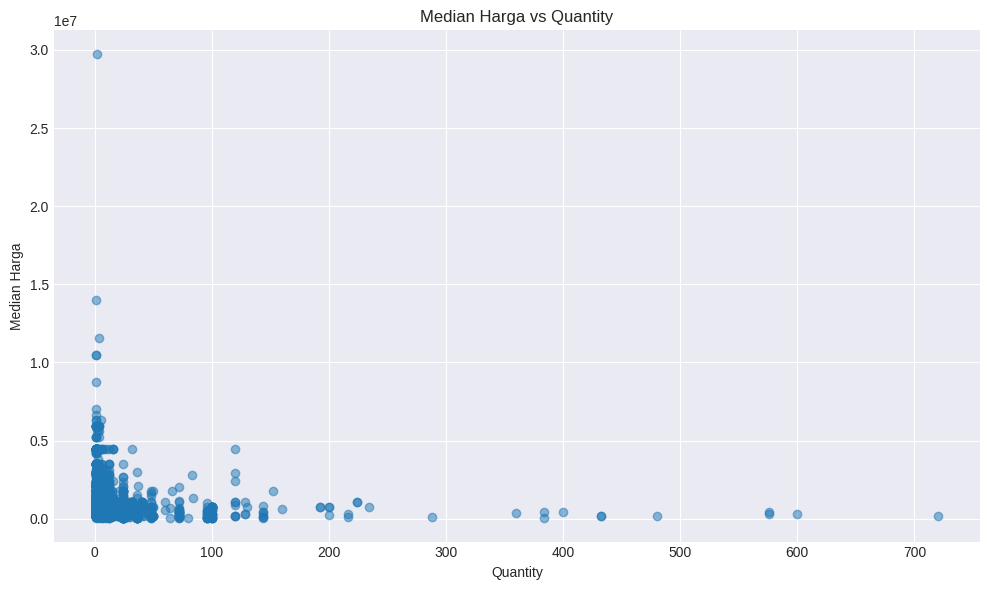

In [ ]:
import matplotlib.pyplot as plt

data_analysis = dataset[['product_id', 'quantity', 'gmv', 'item_price']]
data_analysis = pd.merge(data_analysis, data_analysis.groupby('product_id')['item_price'].median().reset_index(), on='product_id')
data_analysis.rename(columns={'item_price_x': 'price', 'item_price_y': 'median_item_price'}, inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(data_analysis['quantity'], data_analysis['median_item_price'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Median Harga')
plt.title('Median Harga vs Quantity')
plt.tight_layout()
plt.show()
